<a href="https://colab.research.google.com/github/arch8080/Network-Intrusion-Detection/blob/main/Network_Intrusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install opendatasets
!pip install pandas
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arch2212
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture


In [5]:
train=pd.read_csv('/content/network-intrusion-detection/Train_data.csv')
test=pd.read_csv('/content/network-intrusion-detection/Test_data.csv')
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [7]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [9]:
train.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


Class labels: ['normal' 'anomaly']
Class distribution:
 class
normal     13449
anomaly    11743
Name: count, dtype: int64


<ipython-input-10-e24a0a6030a9>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Normal', 'Anomaly'])


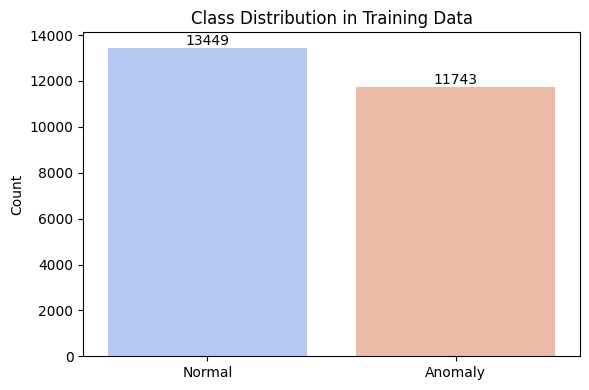

In [10]:
# Check unique values in class
print("Class labels:", train['class'].unique())
print("Class distribution:\n", train['class'].value_counts())

# Plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=train, x="class", hue="class", palette="coolwarm", legend=False)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container)

# Optional: Set custom tick labels if you know 0 = normal, 1 = anomaly
ax.set_xticklabels(['Normal', 'Anomaly'])

# Titles
plt.title("Class Distribution in Training Data")
plt.xlabel("")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


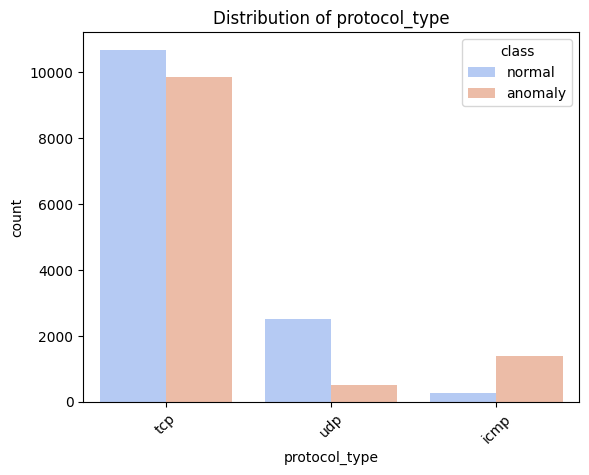

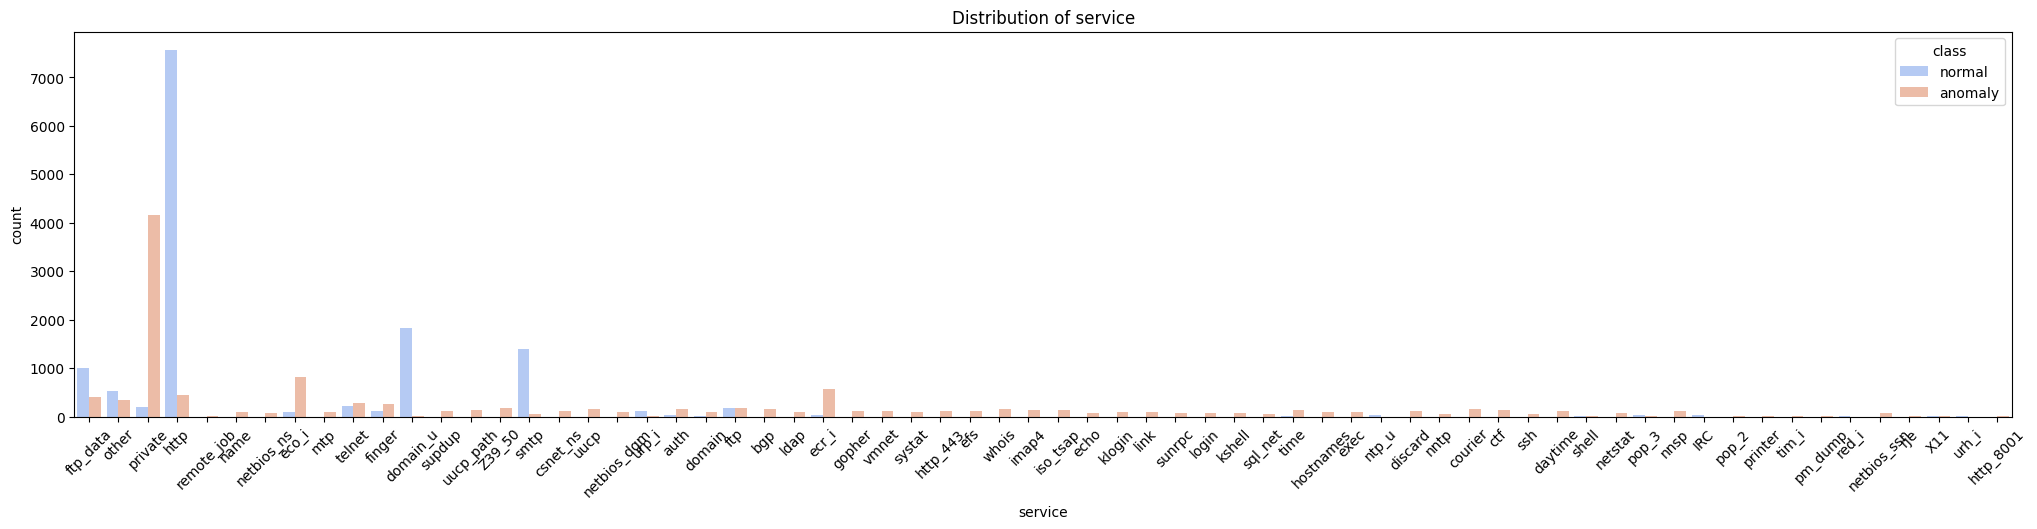

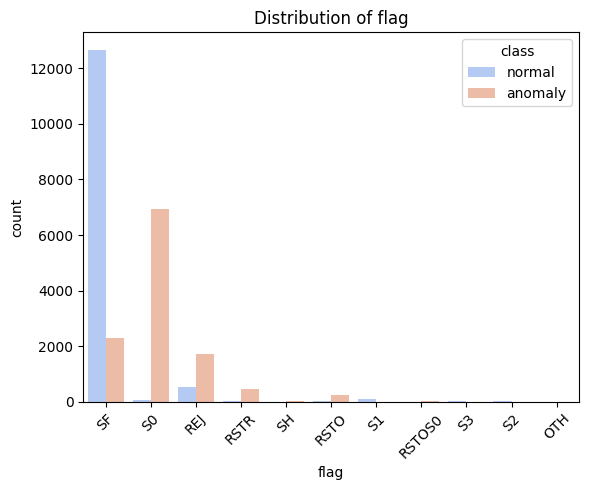

In [11]:
for category in ['protocol_type', 'service', 'flag']:
    if category == 'service':
        plt.figure(figsize=(25, 5))
    sns.countplot(x=category, data=train, hue='class', palette=("coolwarm"))
    plt.title(f'Distribution of {category}')
    plt.xticks(rotation=45)
    plt.show()

In [12]:
# remove missing values (NaN)
train.dropna(inplace=True)

# duplicates
print(f"Number of duplicate rows in train set: {train.duplicated().sum()}")

Number of duplicate rows in train set: 0


In [13]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(train)

train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


Correlations

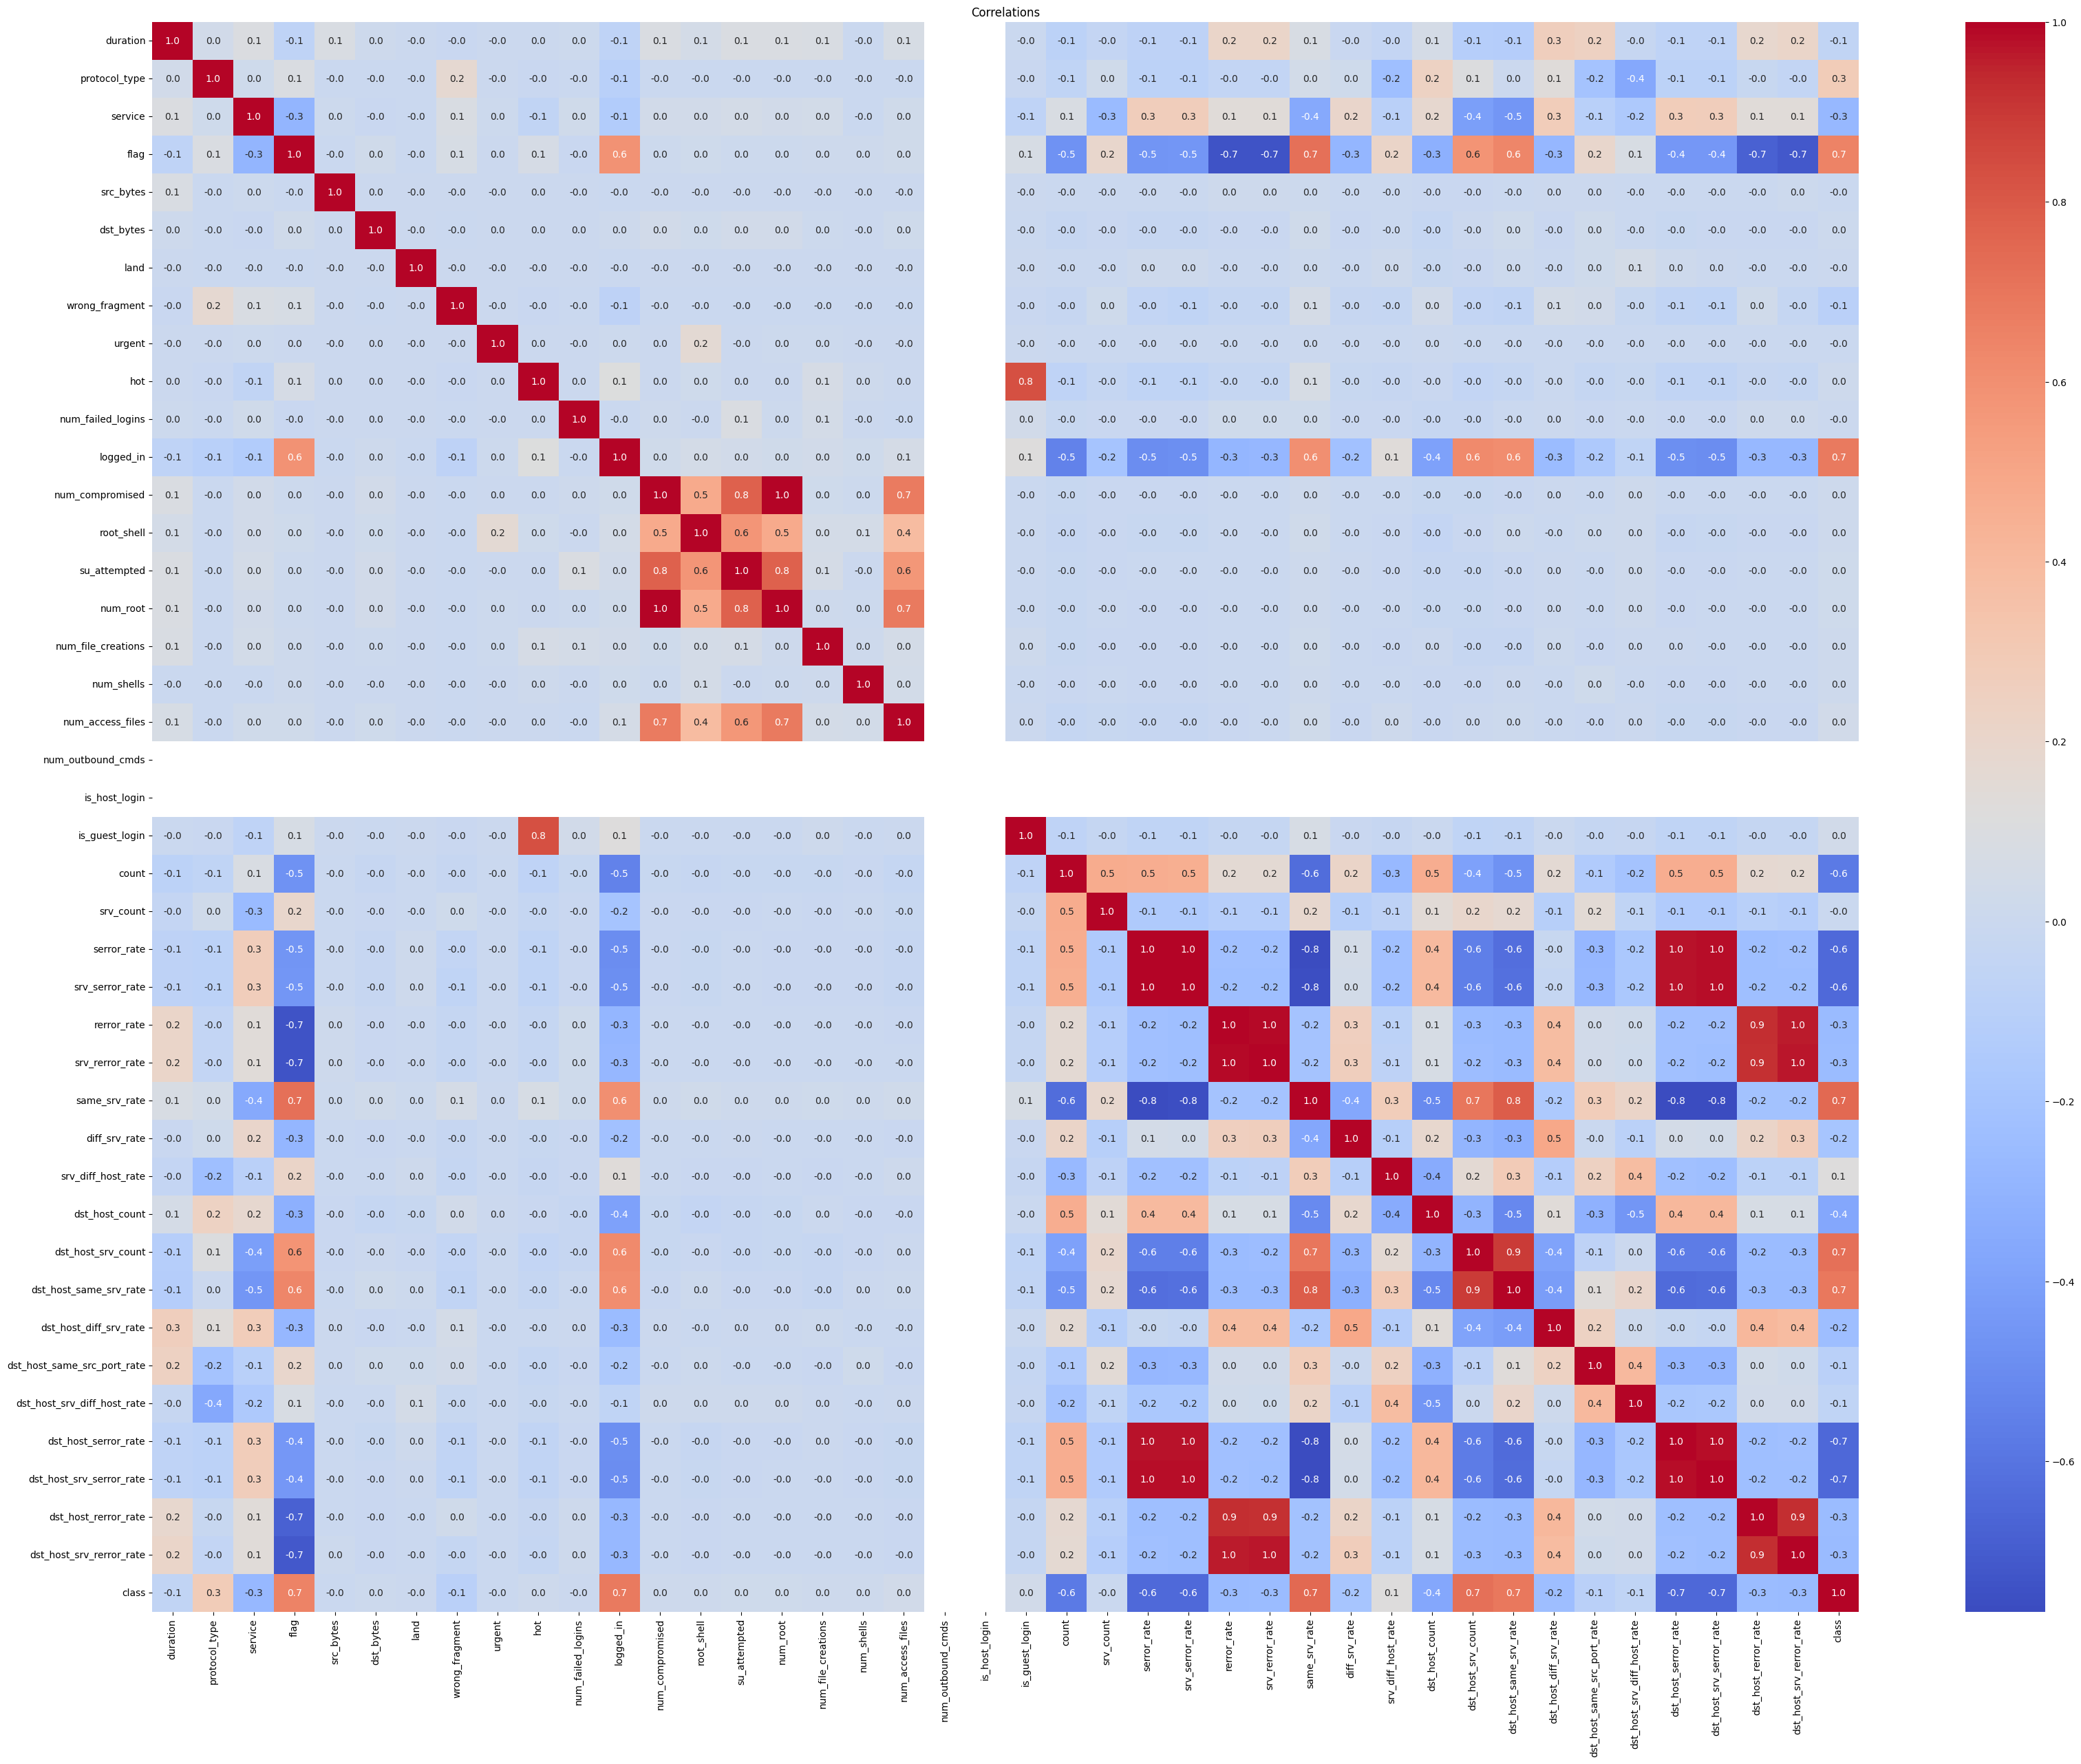

In [14]:
plt.figure(figsize=(40, 30))
sns.heatmap(train.corr(), annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlations')
plt.show()

Index(['flag', 'hot', 'num_compromised', 'su_attempted', 'num_root',
       'is_guest_login', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


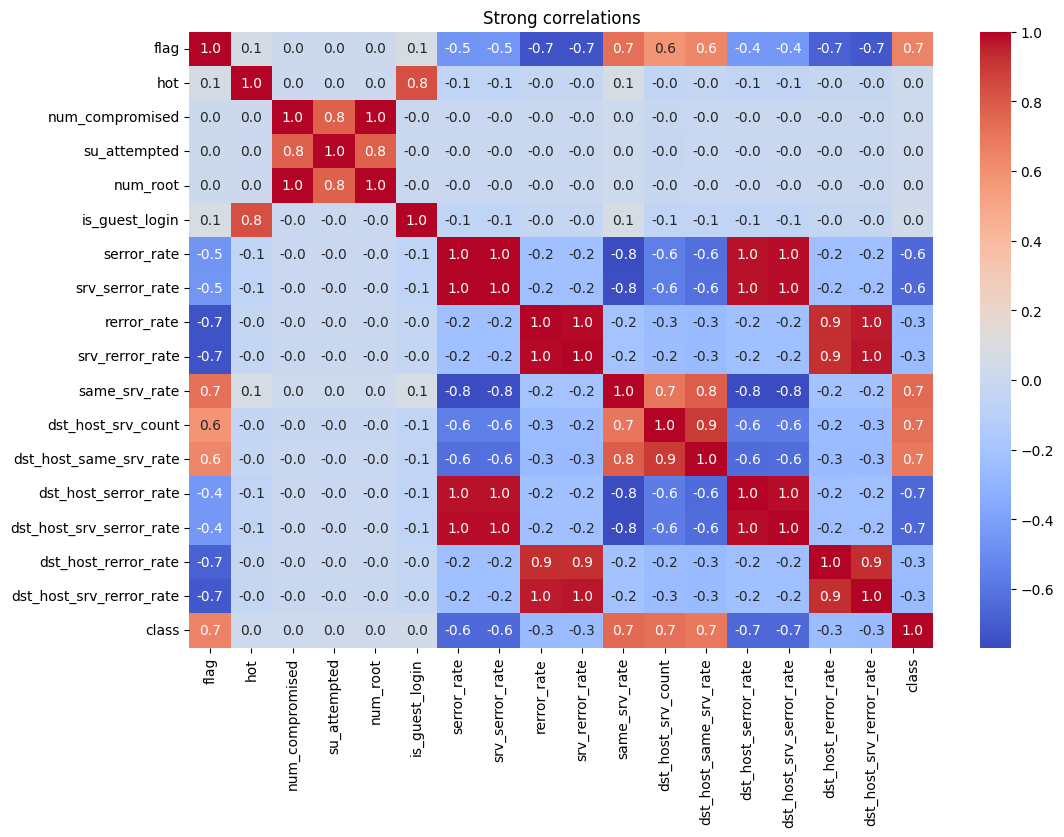

In [15]:
# only strong correlations
corr_matrix = train.corr()
threshold = 0.7

# Create a mask for values above the threshold or below the negative threshold, excluding self-correlation
mask = np.abs(corr_matrix) >= threshold
np.fill_diagonal(mask.values, False)

# Filter the columns and rows based on the mask
filtered_columns = corr_matrix.columns[mask.any()]
filtered_corr = corr_matrix.loc[filtered_columns, filtered_columns]

print(filtered_columns)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Strong correlations')
plt.show()

In [16]:
#removing column with correlation 1:1
X = train.drop(['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate', 'class'], axis=1)
y = train['class']

Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Creating an unbalanced dataset with 5% of anomalies.

In [18]:
def shuffle_data(features, labels):
    indices = np.arange(features.shape[0])
    np.random.shuffle(indices)
    return features[indices], labels[indices]

# Filter normal and anomaly
normal = X[y == 1]
anomalies = X[y == 0]

# Target: 20% anomalies in the final dataset
total_samples = int(len(normal) / 0.8)  # total = normal / 0.8
num_anomalies = total_samples - len(normal)

# Select anomalies
anomaly_indices = np.random.choice(anomalies.shape[0], num_anomalies, replace=False)
selected_anomalies = anomalies.iloc[anomaly_indices]

# Combine and shuffle
X_unbalanced = np.vstack([normal, selected_anomalies])
y_unbalanced = np.concatenate([np.ones(len(normal)), np.zeros(len(selected_anomalies))])
X_unbalanced, y_unbalanced = shuffle_data(X_unbalanced, y_unbalanced)


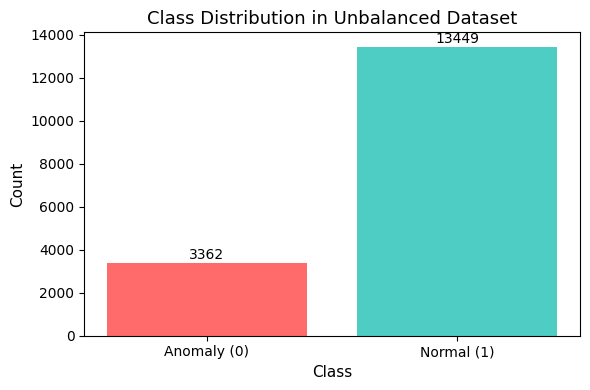

In [19]:
df_unbalanced = pd.DataFrame({'Label': y_unbalanced})

# Count values for labels
label_counts = df_unbalanced['Label'].value_counts().sort_index()
labels = ['Anomaly (0)', 'Normal (1)']

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, label_counts.values, color=['#FF6B6B', '#4ECDC4'])

# Annotate each bar
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50,
             str(count), ha='center', va='bottom', fontsize=10)

plt.title("Class Distribution in Unbalanced Dataset", fontsize=13)
plt.xlabel("Class", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.tight_layout()
plt.show()

Supervised Models


In [48]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Custom function to evaluate model
def evaluate_model(model, X, y):
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, zero_division=0),
        'recall': make_scorer(recall_score, zero_division=0),
        'f1': make_scorer(f1_score, zero_division=0)
    }

    results = cross_validate(model, X, y, scoring=scoring, cv=5, return_train_score=False)
    return results

# Display results nicely
def display_results(results):
    metrics = {
        "Metric": ["Fit Time", "Score Time", "Accuracy", "Precision", "Recall", "F1 Score"],
        "Value": [
            results["fit_time"].mean(),
            results["score_time"].mean(),
            results["test_accuracy"].mean(),
            results["test_precision"].mean(),
            results["test_recall"].mean(),
            results["test_f1"].mean()
        ]
    }

    import pandas as pd
    df = pd.DataFrame(metrics)
    print(df)


Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000, solver='liblinear')
log_results = evaluate_model(log_reg, X_unbalanced, y_unbalanced)

print(" Logistic Regression Results:")
display_results(log_results)


 Logistic Regression Results:
       Metric     Value
0    Fit Time  0.407128
1  Score Time  0.009918
2    Accuracy  0.950984
3   Precision  0.945723
4      Recall  0.995911
5    F1 Score  0.970162


In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt_results = evaluate_model(dt, X_unbalanced, y_unbalanced)

print(" Decision Tree Results:")
display_results(dt_results)


 Decision Tree Results:
       Metric     Value
0    Fit Time  0.095875
1  Score Time  0.011664
2    Accuracy  0.995182
3   Precision  0.996733
4      Recall  0.997249
5    F1 Score  0.996989


In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf_results = evaluate_model(rf, X_unbalanced, y_unbalanced)

print(" Random Forest Results:")
display_results(rf_results)


 Random Forest Results:
       Metric     Value
0    Fit Time  1.010196
1  Score Time  0.039115
2    Accuracy  0.997204
3   Precision  0.997329
4      Recall  0.999182
5    F1 Score  0.998254


In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_results = evaluate_model(knn, X_unbalanced, y_unbalanced)

print(" K-Nearest Neighbors Results:")
display_results(knn_results)


 K-Nearest Neighbors Results:
       Metric     Value
0    Fit Time  0.003716
1  Score Time  0.347530
2    Accuracy  0.988936
3   Precision  0.992434
4      Recall  0.993754
5    F1 Score  0.993090


In [53]:
from sklearn.svm import SVC

svm = SVC()
svm_results = evaluate_model(svm, X_unbalanced, y_unbalanced)

print(" Support Vector Machine Results:")
display_results(svm_results)


 Support Vector Machine Results:
       Metric     Value
0    Fit Time  6.300320
1  Score Time  1.500911
2    Accuracy  0.800190
3   Precision  0.800226
4      Recall  0.999851
5    F1 Score  0.888970


In [54]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb_results = evaluate_model(nb, X_unbalanced, y_unbalanced)

print("Naive Bayes Results:")
display_results(nb_results)



Naive Bayes Results:
       Metric     Value
0    Fit Time  0.011676
1  Score Time  0.013753
2    Accuracy  0.904468
3   Precision  0.942415
4      Recall  0.937913
5    F1 Score  0.940137


CLUSTERING MODELS:
1)Gaussian Mixture Models


K-Means Clustering Results:
      Metric     Value
0   Accuracy  0.800012
1  Precision  0.800012
2     Recall  1.000000
3   F1 Score  0.888896


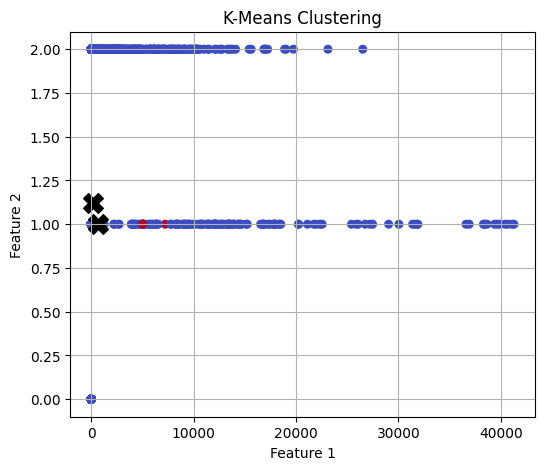

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fitting KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_unbalanced)
kmeans_labels = kmeans.predict(X_unbalanced)

# Correcting labels (optional, only if you have y_unbalanced)
corrected_labels = np.zeros_like(kmeans_labels)
for i in range(2):
    mask = (kmeans_labels == i)
    corrected_labels[mask] = mode(y_unbalanced[mask])[0]

# Evaluation (only if you have true labels)
accuracy = accuracy_score(y_unbalanced, corrected_labels)
precision = precision_score(y_unbalanced, corrected_labels)
recall = recall_score(y_unbalanced, corrected_labels)
f1 = f1_score(y_unbalanced, corrected_labels)

# Result DataFrame
kmeans_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Value": [accuracy, precision, recall, f1]
})

print("K-Means Clustering Results:")
print(kmeans_results)

# Visualization
plt.figure(figsize=(6, 5))
plt.scatter(X_unbalanced[:, 0], X_unbalanced[:, 1], c=kmeans_labels, cmap='coolwarm', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='X', s=200)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


Hierarchical Clustering Results:
      Metric     Value
0   Accuracy  0.905538
1  Precision  0.954479
2     Recall  0.926091
3   F1 Score  0.940071


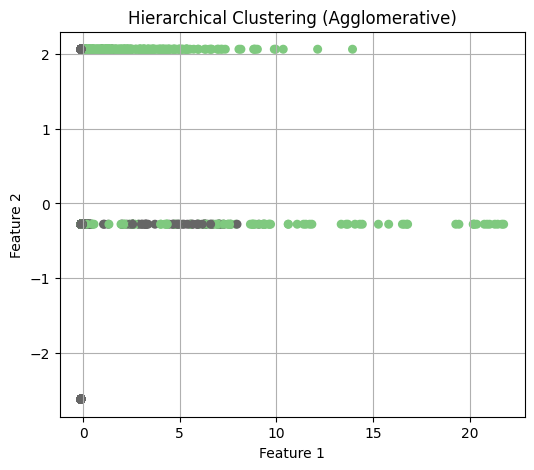

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unbalanced)

# Apply Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X_scaled)

# Correct cluster labels based on majority
corrected_labels = np.zeros_like(agglo_labels)
for i in range(2):
    mask = (agglo_labels == i)
    corrected_labels[mask] = mode(y_unbalanced[mask])[0]

# Evaluation
accuracy = accuracy_score(y_unbalanced, corrected_labels)
precision = precision_score(y_unbalanced, corrected_labels)
recall = recall_score(y_unbalanced, corrected_labels)
f1 = f1_score(y_unbalanced, corrected_labels)

# Results table
agglo_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Value": [accuracy, precision, recall, f1]
})

print("Hierarchical Clustering Results:")
print(agglo_results)

# Visualization
plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='Accent', s=30)
plt.title("Hierarchical Clustering (Agglomerative)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

Gaussian Mixture Model Results:
      Metric     Value
0   Accuracy  0.800012
1  Precision  0.800012
2     Recall  1.000000
3   F1 Score  0.888896


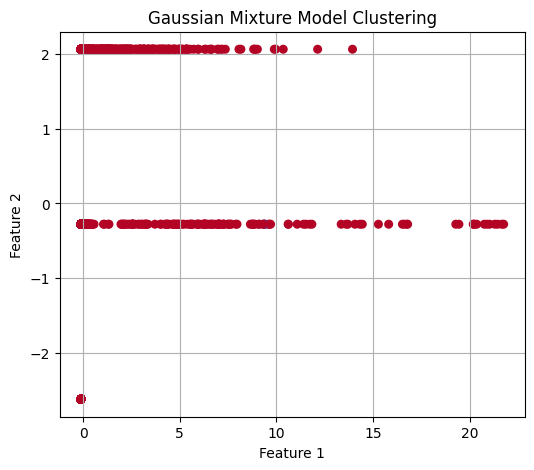

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unbalanced)

# Fit GMM
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Correct cluster labels based on majority
corrected_labels = np.zeros_like(gmm_labels)
for i in range(2):
    mask = (gmm_labels == i)
    corrected_labels[mask] = mode(y_unbalanced[mask])[0]

# Evaluation
accuracy = accuracy_score(y_unbalanced, corrected_labels)
precision = precision_score(y_unbalanced, corrected_labels)
recall = recall_score(y_unbalanced, corrected_labels)
f1 = f1_score(y_unbalanced, corrected_labels)

# Results table
gmm_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Value": [accuracy, precision, recall, f1]
})

print("Gaussian Mixture Model Results:")
print(gmm_results)

# Visualization
plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='coolwarm', s=30)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

Perfromance Comparison Chart

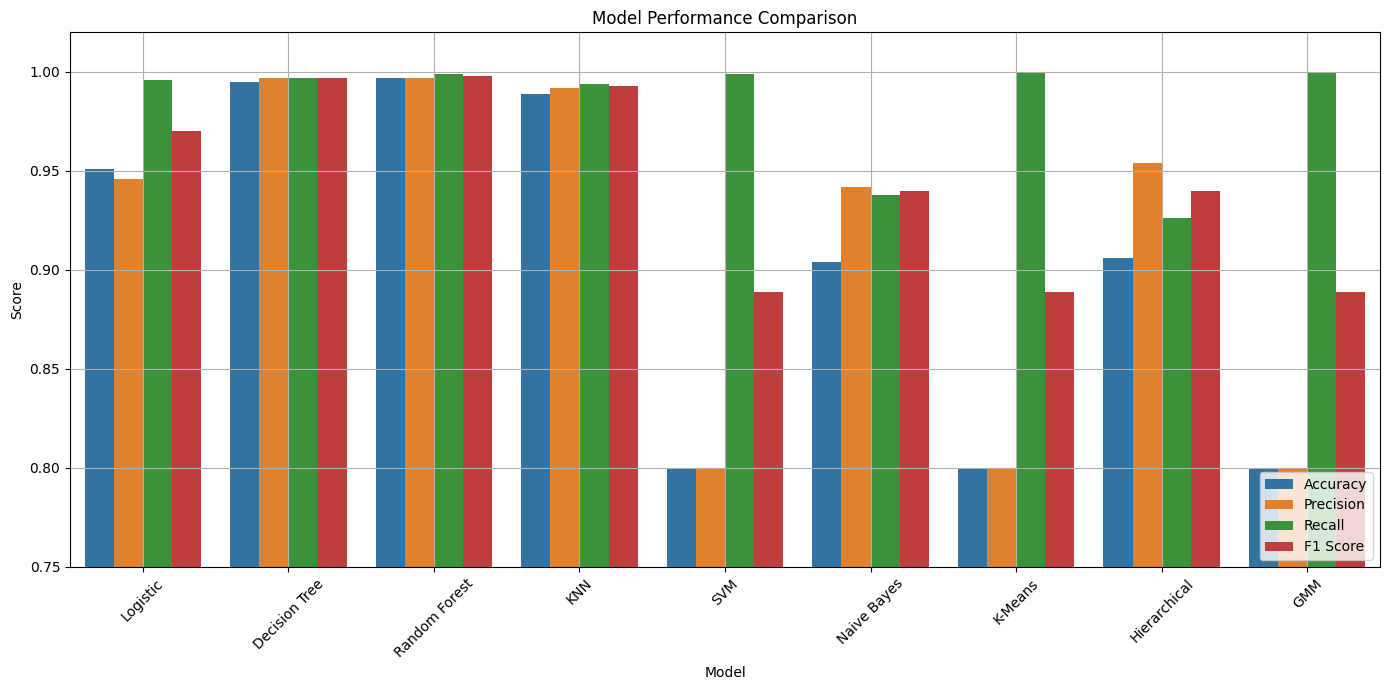

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
models = [
    "Logistic", "Decision Tree", "Random Forest", "KNN", "SVM", "Naive Bayes",
    "K-Means", "Hierarchical", "GMM"
]
accuracy = [0.951, 0.995, 0.997, 0.989, 0.800, 0.904, 0.800, 0.906, 0.800]
precision = [0.946, 0.997, 0.997, 0.992, 0.800, 0.942, 0.800, 0.954, 0.800]
recall = [0.996, 0.997, 0.999, 0.994, 0.999, 0.938, 1.000, 0.926, 1.000]
f1_score = [0.970, 0.997, 0.998, 0.993, 0.889, 0.940, 0.889, 0.940, 0.889]

df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1_score
})

df_melted = df.melt("Model", var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(x="Model", y="Score", hue="Metric", data=df_melted)
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.ylim(0.75, 1.02)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
